# Adaline

In [15]:
import pandas as pd
import numpy as np
from enum import Enum

import adaline_gd
import adaline_sgd
import dr

from importlib import reload
reload(adaline_gd)
reload(adaline_sgd)
reload(dr)

class Attr: # attributes enum for clarity
    SEPALS = 0
    PETAL = 2
    KIND = 4

df = pd.read_csv("iris.data", header=None)

y = df.iloc[0:100, Attr.KIND].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [Attr.SEPALS, Attr.PETAL]].values

df.tail() # data check, outputs last 5 rows


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Gradient Descent

Text(0.5, 1.0, 'ADALINE, learning pace 0.0001')

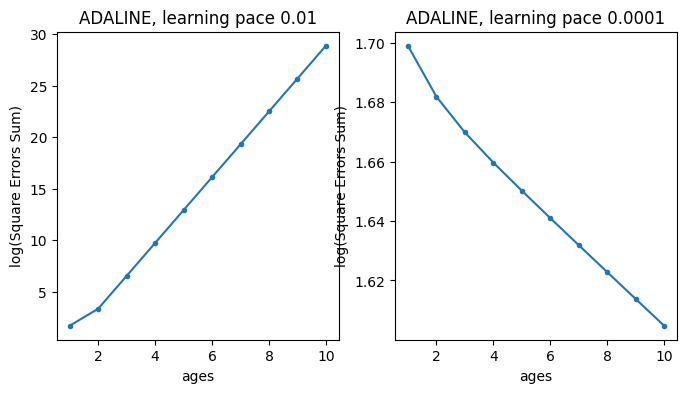

In [16]:
from adaline_gd import AdalineGD
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(
    range(1, len(ada1.cost_) + 1),
    np.log10(ada1.cost_), 
    marker = ".",
)
ax[0].set_xlabel("ages")
ax[0].set_ylabel("log(Square Errors Sum)")
ax[0].set_title("ADALINE, learning pace 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(
    range(1, len(ada2.cost_) + 1),
    np.log10(ada2.cost_), 
    marker = ".",
)
ax[1].set_xlabel("ages")
ax[1].set_ylabel("log(Square Errors Sum)")
ax[1].set_title("ADALINE, learning pace 0.0001")

/home/trofchik/Documents/python/flowers_ml/dr.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


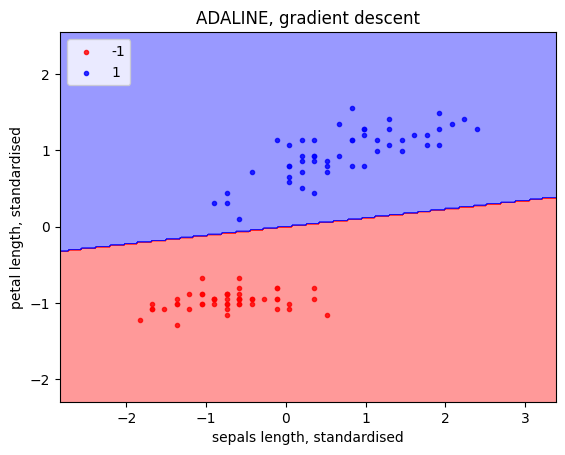

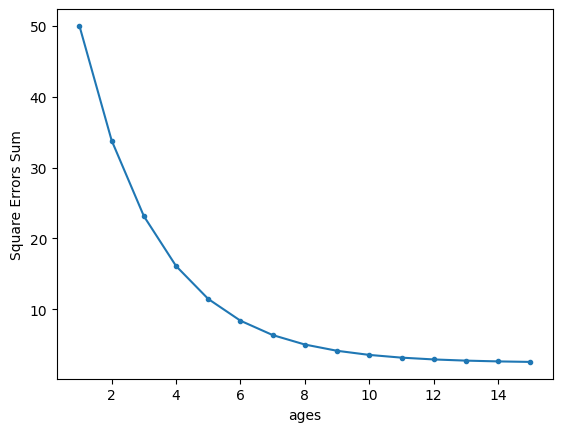

In [17]:

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# teaching model
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

# using teached model to predict class of object and visualize it
dr.plot_decision_regions(X_std, y, classifier=ada)
plt.title("ADALINE, gradient descent")
plt.xlabel("sepals length, standardised")
plt.ylabel("petal length, standardised")
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker=".")
plt.xlabel("ages")
plt.ylabel("Square Errors Sum")
plt.show()

# Stochastic Gradient Descent

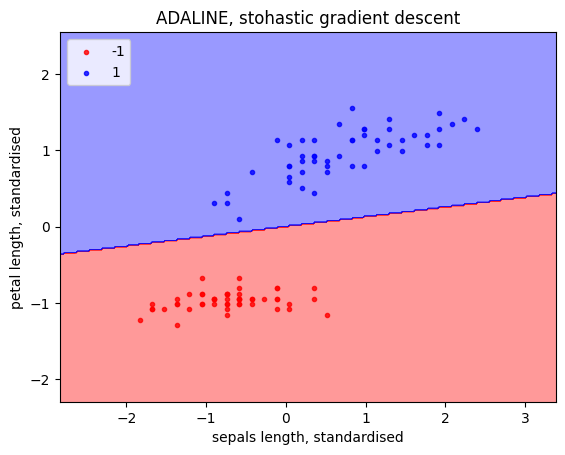

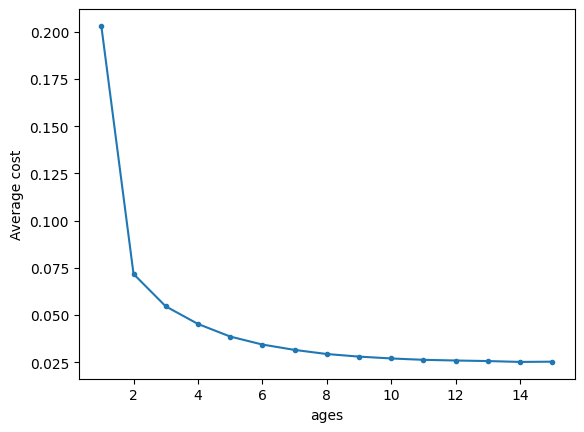

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
from adaline_sgd import AdalineSGD

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
dr.plot_decision_regions(X_std, y, classifier=ada)
plt.title("ADALINE, stohastic gradient descent")
plt.xlabel("sepals length, standardised")
plt.ylabel("petal length, standardised")
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker=".")
plt.xlabel("ages")
plt.ylabel("Average cost")
plt.show()